In [4]:
import numpy as np
import stim
import matplotlib.pyplot as plt

In [5]:
def get_pauli_error(d):
    return .5 - .5 * np.sqrt(1 - 4./3. * d)

finished distance: 3
finished distance: 5
finished distance: 7
finished distance: 9
finished distance: 11


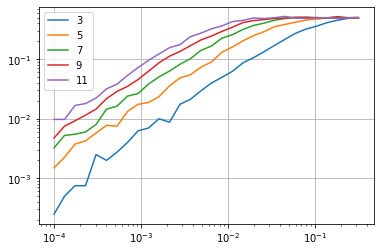

In [8]:
code_distances = [3,5,7,9]
shots = 4_000
p_phys = np.logspace(-4, -0.5, num=30)

results = {}

for d in code_distances:
    d_results = []
    for noise in p_phys:
        noise_d_results = []
        p = get_pauli_error(noise)
        for _ in range(shots):
            pauli_string = stim.PauliString(d)
            for _ in range(d):
                for i in range(3):
                    s = np.random.binomial(1, p, d) * (i+1)
                    pauli_string *= stim.PauliString(s)

            com = pauli_string.commutes(stim.PauliString("X"*d))
            noise_d_results.append(com)
        d_results.append(1 - np.sum(noise_d_results)/shots)
    results[d] = d_results
    print(f"finished distance: {d}") 


    
for d in code_distances:
    plt.plot(p_phys, results[d], label=d)
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In [51]:
v = stim.PauliString(5)
v[[0,1,2]] = 2
print(v)

TypeError: __setitem__(): incompatible function arguments. The following argument types are supported:
    1. (self: stim._stim_avx2.PauliString, index: int, new_pauli: object) -> None

Invoked with: stim.PauliString("+_____"), [0, 1, 2], 2